In [1]:
from scripts import dataset, metrics
import pickle
import glob
import math

In [2]:
import numpy as np

In [ ]:
x_train, x_test = dataset.create_xtrain_xtest()
signal = dataset.load_dataset('BSM_preprocessed.h5', 'GluGluHToTauTau')

In [28]:
kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'depth'}

In [ ]:
dafasdfas

In [25]:
def get_seed_uncertainty(kwargs, x_test, signal):
    # here we assume that we have already trained the models :-)
    model_string = "trained_models/model__" + "__".join([f"{key}_{value}" for key, value in kwargs.items()])+"*"
    model_names = glob.glob(model_string)
    fprs = {}
    tprs = {}
    aucs = {}
    for i in range(len(model_names)):
        fprs[i], tprs[i], aucs[i] = metrics.predict_value(model=model_names[i], x_test=x_test, signal=signal)

    # interpolate

    interp_tpr={}
    base = np.exp(np.linspace(math.log(0.00000005), 0., 1000000)) # bc we are interested in the loglog plot later! :)
    seeds = [0,1,2,3,4]#,39, 23123]
    for i in seeds:
        interp_tpr[i] = np.interp(base, fprs[i], tprs[i])

    mean_curve = np.mean(list(interp_tpr.values()), axis=0)
    error_curve = np.std(list(interp_tpr.values()), axis=0)

    return mean_curve, error_curve, base



def plot_auroc_unc_(mean_curve, error_curve, base):    
    plt.plot(base,mean_curve, linewidth=1.5)
    plt.semilogx()
    plt.semilogy()
    plt.fill_between(base,
                mean_curve - error_curve,
                mean_curve + error_curve,
                alpha=0.5,
            label = 'depth')
    plt.legend()

In [5]:
x_train, x_test = dataset.create_xtrain_xtest()
signal = dataset.load_dataset('BSM_preprocessed.h5', 'GluGluHToTauTau')

In [19]:
kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'depth'}
mean, std, base = get_seed_uncertainty(kwargs=kwargs, x_test=x_test, signal=signal)

In [21]:
import matplotlib.pyplot as plt

(1e-06, 1.05)

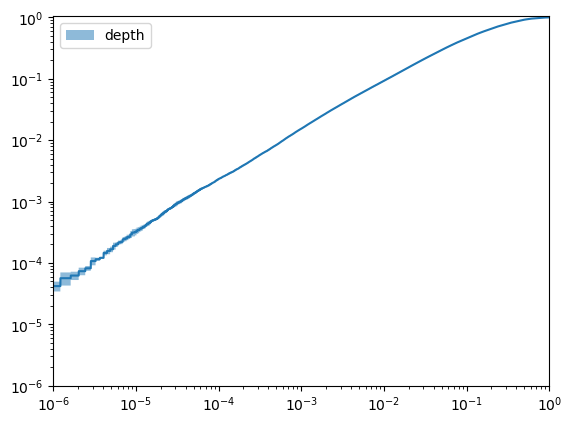

In [27]:
plot_auroc_unc_(mean, std, base)
plt.xlim([10**-(6), 1.0])
plt.ylim([10**-(6), 1.05])

In [26]:
kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'depth'}
model_string = "trained_models/model__" + "__".join([f"{key}_{value}" for key, value in kwargs.items()])+"*"


In [30]:
type()

list

['trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_1',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_0',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_23123',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_39',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_2',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_3',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_4']

In [14]:
kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'depth'}

model_string = "trained_models/model__" + "__".join([f"{key}_{value}" for key, value in kwargs.items()])
print(model_string)
kwargs['random_seed'] = i

trained_models/model__ndim_1__ntrees_100__scoring_metric_depth


In [16]:
import glob

# Define the pattern to match files
pattern = 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth*'

# Get a list of file paths matching the pattern
matching_files = glob.glob(pattern)

# Print the names of the matching files
for file_path in matching_files:
    print(file_path)



trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_1
trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_0
trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_23123
trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_39
trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_2
trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_3
trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_4


In [17]:
matching_files

['trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_1',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_0',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_23123',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_39',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_2',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_3',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__random_seed_4']

In [15]:
model_string

'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth'

In [4]:
rands = [0, 1, 2, 3, 4]  

model_names = {}
fprs = {}
tprs = {}
aucs = {}

for i in rands:
    kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'depth', 'random_seed': i}
    model_names[i] = metrics.train_and_save_model(kwargs, x_train)
    fprs[i], tprs[i], aucs[i] = metrics.predict_value(model=model_names[i], x_test=x_test, signal=signal)

This model already exists!
This model already exists!
This model already exists!
This model already exists!
This model already exists!


[]

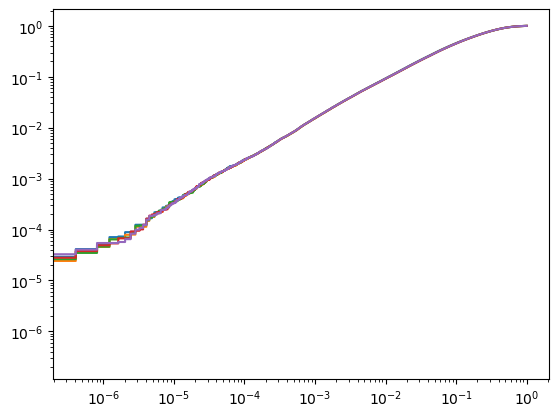

In [5]:
import matplotlib.pyplot as plt
plt.plot(fprs[0],tprs[0])
plt.plot(fprs[1],tprs[1])
plt.plot(fprs[2],tprs[2])
plt.plot(fprs[3],tprs[3])
plt.plot(fprs[4],tprs[4])
plt.semilogx()
plt.semilogy()

(1e-05, 0.0001)

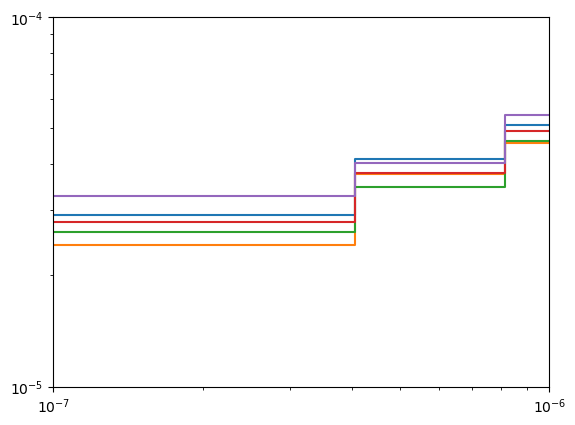

In [6]:
import matplotlib.pyplot as plt
plt.plot(fprs[0],tprs[0])
plt.plot(fprs[1],tprs[1])
plt.plot(fprs[2],tprs[2])
plt.plot(fprs[3],tprs[3])
plt.plot(fprs[4],tprs[4])
plt.semilogx()
plt.semilogy()
plt.xlim(0.0000001, 0.000001)
plt.ylim(0.00001, 0.0001)

In [7]:
import math
interp_tpr={}
base = np.exp(np.linspace(math.log(0.00000005), 0., 1000000)) # bc we are interested in the loglog plot later! :)

for i in range(0,5):
    interp_tpr[i] = np.interp(base, fprs[i], tprs[i])


offo = np.mean(list(interp_tpr.values()), axis=0)
obb = np.std(list(interp_tpr.values()), axis=0)

In [8]:
offo = np.mean(list(interp_tpr.values()), axis=0)
obb = np.std(list(interp_tpr.values()), axis=0)

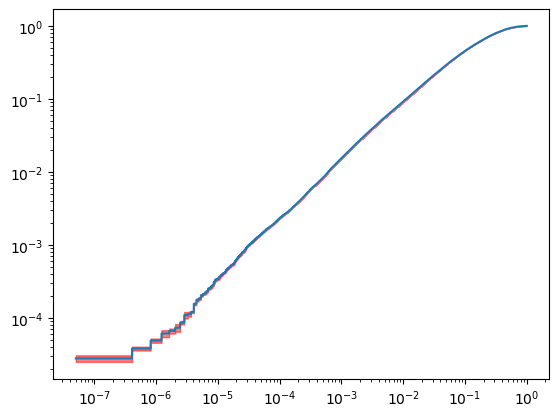

In [9]:
# for i in range(0,5):
#     plt.plot(fprs[i],tprs[i], linewidth=0.3)
plt.plot(base,offo, linewidth=1.5)
plt.semilogx()
plt.semilogy()
plt.fill_between(base,
            offo - obb,
            offo + obb,
            alpha=0.5,
            color='red'
        )

In [64]:
interp_tprs

[array([2.92302172e-05, 2.92302172e-05, 2.92302172e-05, ...,
        9.99998236e-01, 9.99999748e-01, 1.00000000e+00]),
 array([2.41905246e-05, 2.41905246e-05, 2.41905246e-05, ...,
        9.99998236e-01, 9.99999748e-01, 1.00000000e+00]),
 array([2.62064016e-05, 2.62064016e-05, 2.62064016e-05, ...,
        9.99998236e-01, 9.99999748e-01, 1.00000000e+00]),
 array([2.79702940e-05, 2.79702940e-05, 2.79702940e-05, ...,
        9.99998236e-01, 9.99999748e-01, 1.00000000e+00]),
 array([3.27580020e-05, 3.27580020e-05, 3.27580020e-05, ...,
        9.99998236e-01, 9.99999748e-01, 1.00000000e+00])]

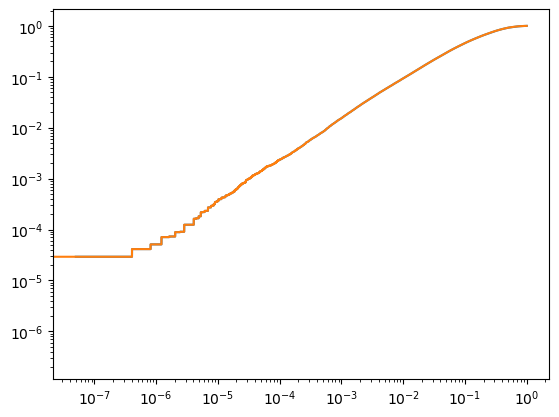

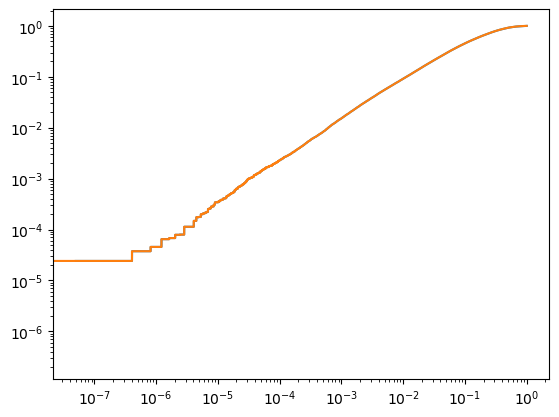

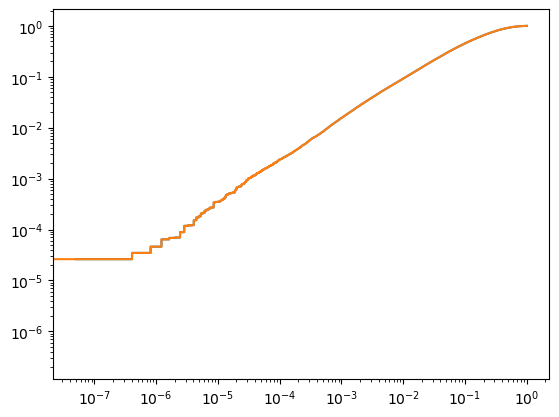

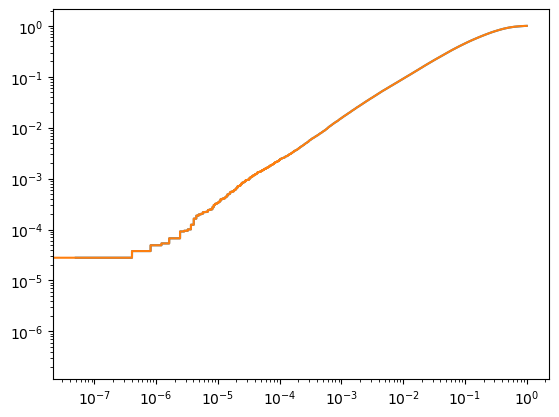

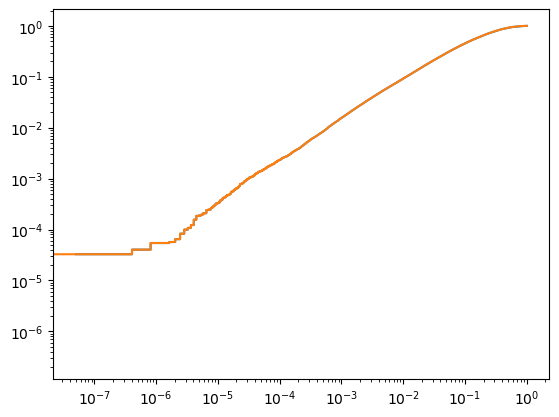

In [38]:
for i in range(0,5):
    plt.plot(base, interp_tpr[i])
    plt.plot(fprs[i],tprs[i])
    plt.semilogx()
    plt.semilogy()
    plt.show()

[]

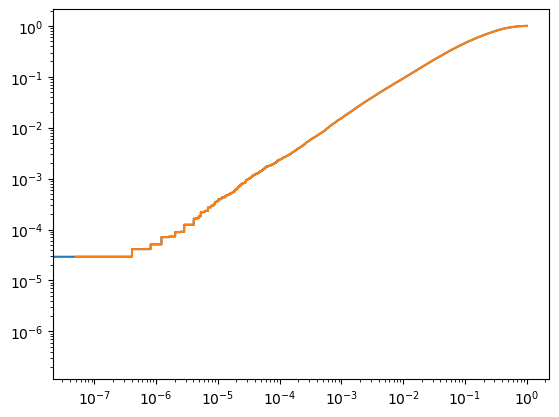

In [35]:
plt.plot(fprs[0],tprs[0])
plt.plot(base, interp_tpr[0])

plt.semilogx()
plt.semilogy()

In [7]:
# import math
# interp_tpr={}
# # base = np.exp(np.linspace(math.log(0.0000005), 0., 1000000)) # bc we are interested in the loglog plot later! :)
# base = np.linspace(math.log(0.0000005), 0., 1000000) # bc we are interested in the loglog plot later! :)

# for i in range(0,5):
#     interp_tpr[i] = interp(base, fprs[i], tprs[i])

/var/folders/x5/mwcfdcrn1xb05dbsm5_wdgfw0000gn/T/ipykernel_2379/931375902.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr[i] = interp(base, fprs[i], tprs[i])


In [15]:
datasets = list(interp_tpr.values())
# std_dev = np.std(datasets, axis=0)
# base_mean = np.mean(datasets, axis=0)

In [ ]:
dasflfa

In [ ]:
# def roc_curves_uncert(
#     tpr: np.ndarray,
#     fprs: np.ndarray,
#     fprs_errs: np.ndarray,
#     aucs: np.ndarray,
#     aucs_errs: np.ndarray,
#     fats: np.ndarray,
#     fats_errs: np.ndarray,
#     outdir: str,
# ):
#     """Plots ROC curves given fprs and tprs for each class."""
#     labels = ["Gluon", "Quark", "W", "Z", "Top"]
#     cols = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000"]
#     tpr_baseline = np.linspace(0.025, 0.99, 100)
#     for idx, label in enumerate(labels):
#         plt.plot(
#             tpr,
#             fprs[idx],
#             color=cols[idx],
#             label=f"{label}: {aucs[idx]*100:.1f}%; FAT: {fats[idx]:.4f} $\\pm$ {fats_errs[idx]:.4f}",
#         )
#         plt.fill_between(
#             tpr,
#             fprs[idx] - fprs_errs[idx],
#             fprs[idx] + fprs_errs[idx],
#             color=cols[idx],
#             alpha=0.5,
#         )

#     plt.xlabel("True Positive Rate")
#     plt.ylabel("False Positive Rate")
#     plt.ylim(0.001, 1)
#     plt.semilogy()

#     plt.legend()
#     plt.savefig(os.path.join(outdir, "roc_curves.pdf"))
#     plt.close()
#     print(f"ROC curves plot saved to {outdir}.")

In [ ]:
# def find_nearest(array: np.ndarray, value: float):
#     """Finds the index of the nearest value in an array to a given value."""
#     array = np.asarray(array)
#     return (np.abs(array - value)).argmin()

In [ ]:
# def roc_curves(outdir: str, y_pred: np.ndarray, y_test: np.ndarray):
#     """Plot the ROC curves for the labels of the jet data set."""
#     labels = ["Gluon", "Quark", "W", "Z", "Top"]
#     cols = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000"]
#     tpr_baseline = np.linspace(0.025, 0.99, 100)
#     fprs = []
#     aucs = []
#     fprs_at_tprs = []
#     for idx, label in enumerate(labels):
#         fpr, tpr, thr = metrics.roc_curve(y_test[:, idx], y_pred[:, idx])
#         auc = metrics.auc(fpr, tpr)
#         aucs.append(auc)
#         fpr_baseline = np.interp(tpr_baseline, tpr, fpr)
#         fprs.append(fpr_baseline)
#         fpr_baseline.astype("float32").tofile(os.path.join(outdir, f"fpr_{label}.dat"))
#         tpr_baseline.astype("float32").tofile(os.path.join(outdir, f"tpr_{label}.dat"))
#         tpr_idx = find_nearest(tpr, 0.8)
#         plt.plot(
#             tpr,
#             fpr,
#             color=cols[idx],
#             label=f"{label}: AUC = {auc*100:.1f}%; FPR @ 80% TPR: {fpr[tpr_idx]:.3f}",
#         )
#         fprs_at_tprs.append(fpr[tpr_idx])

#     plt.xlabel("True Positive Rate")
#     plt.ylabel("False Positive Rate")
#     plt.ylim(0.001, 1)
#     plt.semilogy()

#     plt.legend()
#     plt.savefig(os.path.join(outdir, "roc_curves.pdf"))
#     plt.close()
#     print(f"ROC curves plot saved to {outdir}.")

#     return fprs, tpr_baseline, aucs, fprs_at_tprs

In [ ]:
# np.mean(value, axis=0), f"{key}_errs": np.std(value, axis=0)

In [40]:
from scipy import interp

In [ ]:
#   fig = plt.figure()
#   ax = fig.add_subplot()
    
#   for i, label in enumerate(labels):
    
#     npoints = 50
#     base_fpr = np.exp(np.linspace(math.log(0.0005), 0., npoints))

#     First = True
#     tpr_array = np.array([])
#     auc_array = []
    
#     for fold in folds:
#       this_fpr         = np.array(fprs[label][fold])
#       this_tpr         = np.array(tprs[label][fold])
#       tpr_interpolated = interp(base_fpr, this_fpr, this_tpr)
#       tpr_interpolated = tpr_interpolated.reshape((1,npoints))
#       tpr_array        = np.concatenate([tpr_array, tpr_interpolated], axis=0) if tpr_array.size else tpr_interpolated
#       auc_array.append(aucs[label][fold])
#       print('aucs[{}][{}]={}'.format(label,fold,aucs[label][fold]))
    

#         mean_tpr  = np.mean(tpr_array, axis=0)
#     rms_tpr   = np.std(tpr_array, axis=0)
#     plus_tpr  = np.minimum(mean_tpr+rms_tpr, np.ones(npoints))
#     minus_tpr = np.maximum(mean_tpr-rms_tpr,np.zeros(npoints))
#     avg_tpr   = mean_tpr

#     auc_array = np.array(auc_array)
#     Mean_AUC  = float(np.mean(auc_array, axis=0))
#     RMS_AUC   = float(np.std(auc_array, axis=0))
    
#     print('label')
#     print(label)
#     print('Mean_AUC' )
#     print(Mean_AUC )
#     print('RMS_AUC ')
#     print(RMS_AUC)
#     print('{}) AUC = {} pm {}'.format(label,Mean_AUC,RMS_AUC))

#     plt.plot(base_fpr,avg_tpr,label=r'{} (AUC = {:.4f} $\pm$ {:.4f})'.format(label.replace('j_',''),Mean_AUC,RMS_AUC), linewidth=1.5, color=colors[i])
#     plt.fill_between(base_fpr, minus_tpr, plus_tpr, alpha=0.3, color=colors[i])

#   plt.semilogx()
#   plt.ylabel("True Positive Rate")
#   plt.xlabel("False Positive Rate")
#   plt.xlim(0.0005,1.)
#   plt.ylim(0.2,1.2)
#   add_logo(ax, fig, 0.3, position='upper right')


In [98]:
import math
interp_tpr={}
# base = np.exp(np.linspace(math.log(0.0000005), 0., 1000000)) # bc we are interested in the loglog plot later! :)
base = np.linspace(math.log(0.0000005), 0., 1000000) # bc we are interested in the loglog plot later! :)

for i in range(0,5):
    interp_tpr[i] = interp(base, fprs[i], tprs[i])

/var/folders/x5/mwcfdcrn1xb05dbsm5_wdgfw0000gn/T/ipykernel_894/3683011130.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr[i] = interp(base, fprs[i], tprs[i])


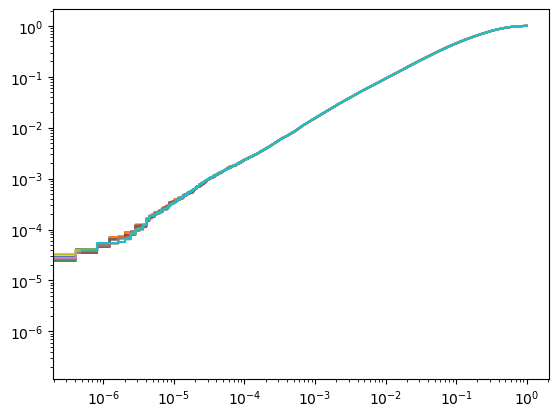

In [93]:
for i in range(0,5):
    plt.plot(fprs[i], tprs[i])
    plt.plot(base, interp_tpr[i])
    plt.semilogx()
    plt.semilogy()


In [99]:
datasets = list(interp_tpr.values())
std_dev = np.std(datasets, axis=0)
base_mean = np.mean(datasets, axis=0)

In [109]:
np.unique(std_dev)

array([0.00000000e+00, 2.89332787e-06])

(0.001, 0.01)

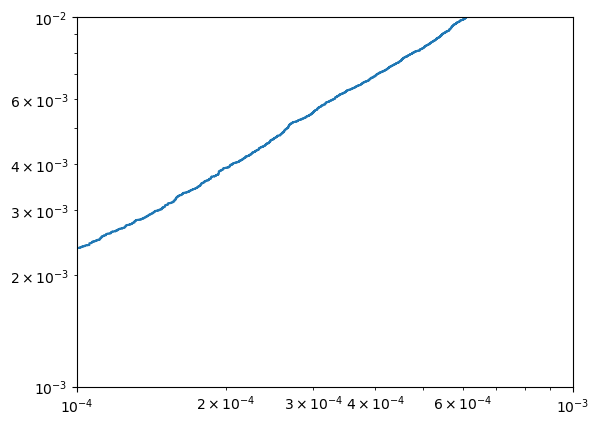

In [107]:
plt.plot(fprs[0], tprs[0])
plt.plot(base, base_mean)

plt.fill_between(base, base_mean - std_dev, base_mean + std_dev)
        #     tpr,
        #     fprs[idx] - fprs_errs[idx],
        #     fprs[idx] + fprs_errs[idx],
        #     color=cols[idx],
        #     alpha=0.5,
        # )
# plt.plot(base, newww)
# plt.plot(fprs[0], tprs[0])

plt.semilogx()
plt.semilogy()
plt.xlim(0.0001, 0.001)
plt.ylim(0.001, 0.01)

In [ ]:
# plt.plot(
#             tpr,
#             fprs[idx],
#             color=cols[idx],
#             label=f"{label}: {aucs[idx]*100:.1f}%; FAT: {fats[idx]:.4f} $\\pm$ {fats_errs[idx]:.4f}",
#         )
#         plt.fill_between(
#             tpr,
#             fprs[idx] - fprs_errs[idx],
#             fprs[idx] + fprs_errs[idx],
#             color=cols[idx],
#             alpha=0.5,
#         )

[]

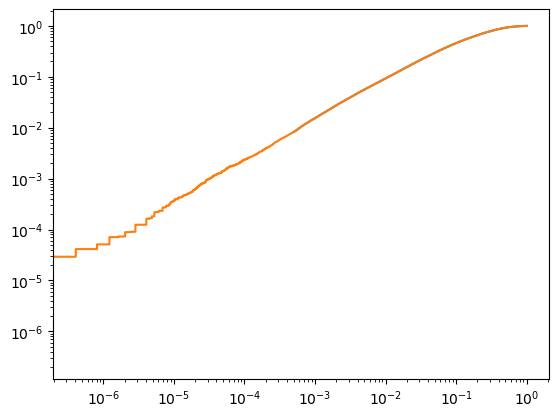

In [63]:
plt.plot(base, newww)
plt.plot(fprs[0], tprs[0])

plt.semilogx()
plt.semilogy()

In [38]:
len(base_fpr)

50

In [23]:
for i in range(0,5):
    print(len(fprs[i]))


2138263
2146925
2146964
2145259
2142491


[]

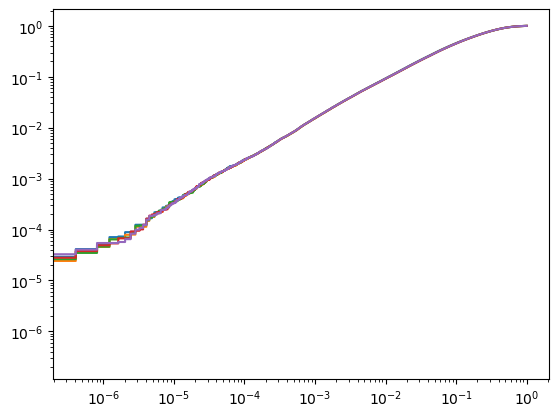

In [31]:
import matplotlib.pyplot as plt
plt.plot(fprs[0],tprs[0])
plt.plot(fprs[1],tprs[1])
plt.plot(fprs[2],tprs[2])
plt.plot(fprs[3],tprs[3])
plt.plot(fprs[4],tprs[4])
plt.semilogx()
plt.semilogy()

In [ ]:
np.mean()

In [6]:
import numpy as np

In [2]:
x_train, x_test = dataset.create_xtrain_xtest()
signal = dataset.load_dataset('BSM_preprocessed.h5', 'GluGluHToTauTau')

In [3]:
rands = [0,1,2,3,4]  
for i in rands:
    kwargs = {'ndim': 1, 'ntrees':100, 'scoring_metric':'depth', 'random_seed': i}
    model_name = metrics.train_and_save_model(kwargs, x_train)
    fpr, tpr, auc = metrics.predict_value(model=model_name, x_test=x_test, signal=signal)

In [4]:
rands = [0, 1, 2, 3, 4]  

model_names = {}
fprs = {}
tprs = {}
aucs = {}

for i in rands:
    kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'depth', 'random_seed': i}
    model_names[i] = metrics.train_and_save_model(kwargs, x_train)
    fprs[i], tprs[i], aucs[i] = metrics.predict_value(model=model_names[i], x_test=x_test, signal=signal)

In [16]:
tprs

{0: array([0.00000000e+00, 2.51984631e-07, 1.31032008e-05, ...,
        9.99999748e-01, 1.00000000e+00, 1.00000000e+00]),
 1: array([0.00000000e+00, 2.51984631e-07, 8.81946208e-06, ...,
        9.99999748e-01, 1.00000000e+00, 1.00000000e+00]),
 2: array([0.00000000e+00, 2.51984631e-07, 5.54366188e-06, ...,
        9.99999748e-01, 1.00000000e+00, 1.00000000e+00]),
 3: array([0.00000000e+00, 2.51984631e-07, 7.55953893e-07, ...,
        9.99999748e-01, 1.00000000e+00, 1.00000000e+00]),
 4: array([0.00000000e+00, 2.51984631e-07, 4.03175410e-06, ...,
        9.99999748e-01, 1.00000000e+00, 1.00000000e+00])}

In [12]:
import statistics

# Calculate the standard deviation
std_dev = statistics.stdev(aucs.values())

print("Standard deviation:", std_dev)

Standard deviation: 0.000743983264446491


In [5]:
aucs

{0: 0.8161933687439528,
 1: 0.8145165669428285,
 2: 0.8144551019312485,
 3: 0.8144568993467628,
 4: 0.8149147444428694}

[]

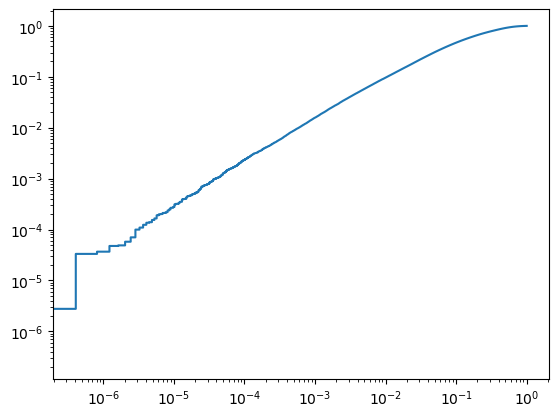

In [4]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.semilogx()
plt.semilogy()